# <b><span style='color:#65365a' id='executive'>|</span> Executive Summary</b>

An ecommerce business which needed to decide between focus on a market based on mobile app and a market based on website is answered through this analysis. Based on the given dataset, the market based on mobile app has a higher correlation to generate more yearly spent than the market based on website.  

Futhermore, a strong relationship between length of membership & yearly users spent found. Therefore, to increase the yearly spent of users, user behaviours analysis to obtain knowledge of measures to lengthen of users membership should be done.  

In addition, a model is built to predict the yearly spent of users which the performance are:
- explained variance: **0.973**
- mean absolute error: **119.947**
- root mean squared error: **10.952** (mean of target column= 499.314)
- r2: **0.972**

---

# <b><span style='color:#0386f7de'>|</span> Content</b>
**[Executive Summary](#executive)**  
1. **[Introduction](#introduction)**  
1. **[Planning](#planning)**  
    - [Structure & Quality Investigation](#structure)  
    - [Data Preprocessing & Visualization](#preprocess)  
    - [Regression Assumptions Check](#assumption)  
    - [Feature Engineering](#feateng)  
    - [Feature Selection](#featsel)  
    - [Modeling](#modeling)  
    - [Final Model](#final)  
    
    
3. **[Wrap Up](#wrap)**  

---

# <b>1 <span style='color:#0386f7de' id='introduction'>|</span> Introduction</b>

#### Business Problem  
Ecommerce businesses are type of businesses that are required to dynamically & flexibility pivot on their operations. Quick & real-time overview on the present condition will be valuable for stakeholders to implement new ideas, innovations, or even changes of operations. One more thing to note is about market segmentation. As shown by the dataset, there are market based on applications and also on website. Between these 2 different market segments, we should prioritize which one should we focus on.  

#### Business Requirement  
- Visualizations on the present condition of business operations for stakeholders take actions.  
- Predicting yearly amount spent.
- Which one between market based on app and based on website should we focus on.  

#### Data Sources  
The dataset used is from Kaggle, thanks to [SAURABH KOLAWALE](https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website).  

The columns inside dataset:  
- 'Email', 
- 'Address', 
- 'Avatar', 
- 'Avg. Session Length', 
- 'Time on App',
- 'Time on Website', 
- 'Length of Membership', 
- 'Yearly Amount Spent' 


---

# <b>2 <span style='color:#0386f7de' id='planning'>|</span> Planning</b>

#### EDA  (Structure Investigation, Quality Investigation, Visualization)
- the distribution of each columns (numerical & categorical)  
- the relationship between columns  
- correlation analysis - the correlation between yearly amount of spent with other columns  
- answering questions:  
  - descriptive analysis of each column
  - yearly amount spent differences between market based on app & website
  - Geographical
      - the distribution of state
      - the average of yearly amount spent in each state
      - the average of avg. session length in each state
      - the average of time on app in each state
      - the average of time on website in each state
      - the average of length of membership in each state
  - email_service_provider distribution  

#### Data Preprocessing  
- remove outliers  
- imputate or remove missing values/columns = **no missing values found**
- remove unnecessary column = **Avatar, Address**
- regression assumption check:
    - linearity
    - hom sket
    - residual
    - multi-collinear


#### Feature Engineering  
- creation of new columns:  
    - email_service_provider  
    - state
    - domain
- Scale numerical columns  
- Encode categorical columns  

#### Feature Selection  
- ~~PCA  ~~
- L1 Regression  
- Random forest features importance  

#### Modelling  
- Methods = ElasticNet, SVR, GradientBoost, RandomForest

#### Modelling Evalution
- Crossvalidation
- Metric: RMSE

#### Final Model  
- train final model
- dump as joblib

#### Production  
- REST API

---

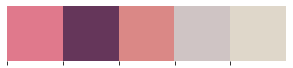

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Setting
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
pd.pandas.set_option('display.max_columns',None)

In [12]:
from itertools import combinations
from scipy import stats
from scipy.stats import norm, skew
from sklearn.metrics import SCORERS

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.linear_model import Lasso , Ridge ,ElasticNet
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor ,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.metrics import  mean_squared_error ,r2_score , explained_variance_score
from sklearn.model_selection import GridSearchCV , learning_curve
from time import time

In [5]:
df = pd.read_csv('.\\datasets\\Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<div style="color:white;display:fill;border-radius:8px;
            background-color:gray;font-size:150%;
            font-family:Calibri;letter-spacing:0.5px" id='structure'>
    <p style="padding: 8px;color:white;"><b>| Structure & Quality Investigation</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [6]:
# columns inside the dataset

df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
# shape of the dataset

df.shape

(500, 8)

In [8]:
# the dataset quick overview
# datatypes in each column are ok

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
# a statistical descriptive in numerical column

df.describe(include='number')

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [10]:
# a statistical descriptive in categorical column

df.describe(exclude='number')

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


In [11]:
# no missing value

df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

<div style="color:white;display:fill;border-radius:8px;
            background-color:gray;font-size:150%;
            font-family:Calibri;letter-spacing:0.5px" id='preprocess'>
    <p style="padding: 8px;color:white;"><b>| Data Preprocessing & Visualization </b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [58]:
# new columns creation

import re

df['email_service_provider'] = df['Email'].apply(lambda x: x.split('@')[-1])
df['state'] = df['Address'].apply(lambda x: re.compile(r' [A-Z][A-Z] ').search(x).group().strip())

In [59]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,email_service_provider,state
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR


In [105]:
# drop unnecessary columns

df.drop(labels=['Address', 'Email', 'Avatar'], 
        axis=1,
       inplace=True)

In [62]:
# remove outliers

num_features_col = df.select_dtypes(include='number').columns

def detect_outliers(df, n, num_features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """

    from collections import Counter
    outlier_indices = []
    
    for col in num_features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
       
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices) # convert it into counter      
    # if outlier count (v variable) is greater than n=0, will be 
    # inserted inside variable
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers


Outliers_to_drop=detect_outliers(df, 0, num_features_col)

In [64]:
df.drop(labels=Outliers_to_drop, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

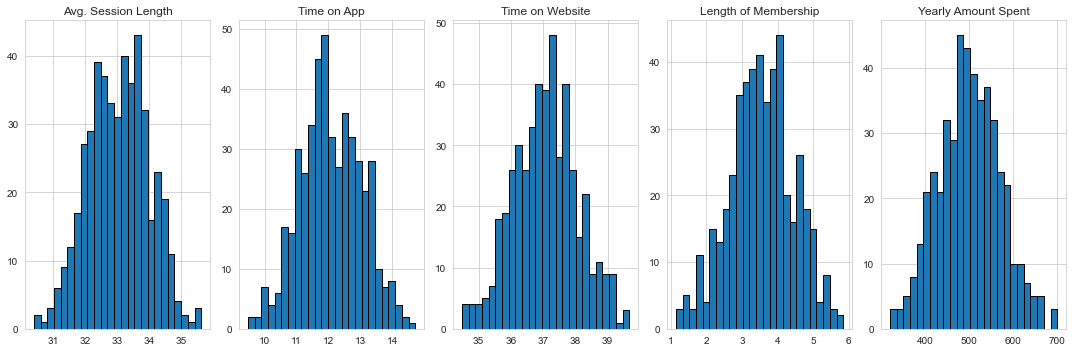

In [131]:
# numerical columns distribution
# time on website is higher than time on app

df.hist(bins=25,
        figsize=(15,5),
        layout=(-1,5),
        edgecolor="black")
plt.savefig('.\\assets\\num_dist.png')
plt.tight_layout();

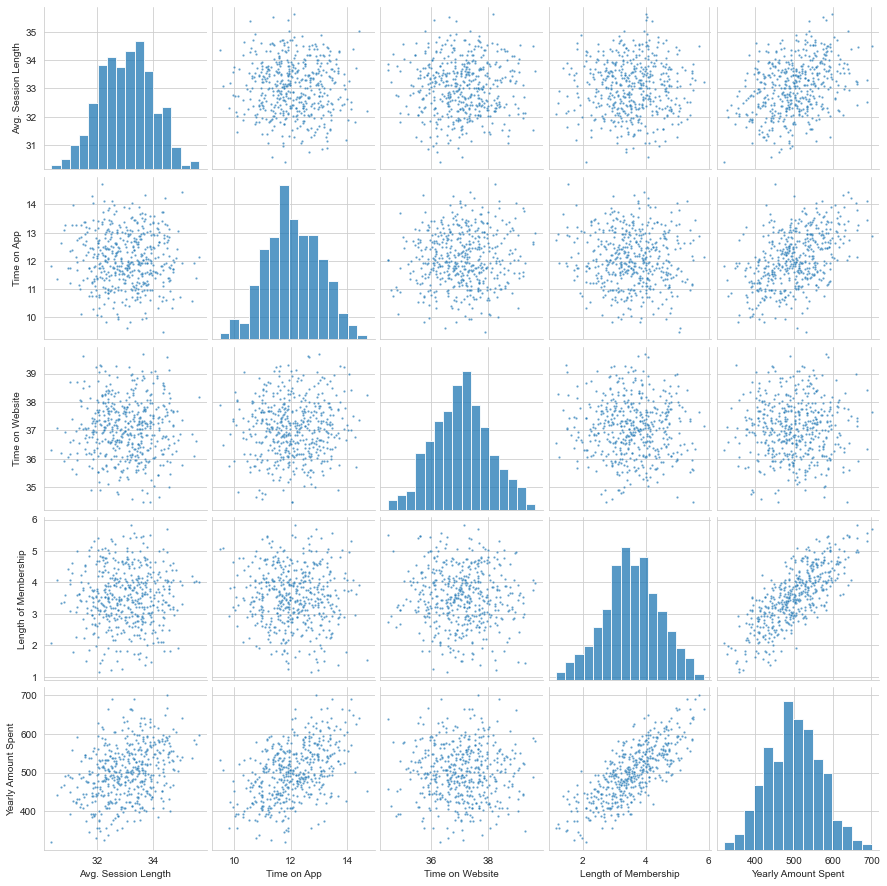

In [132]:
# relationship between each numerical feature

sns.pairplot(df, plot_kws={"s":5, "alpha":0.7})
plt.savefig('.\\assets\\pairplot_num.png')
plt.show()

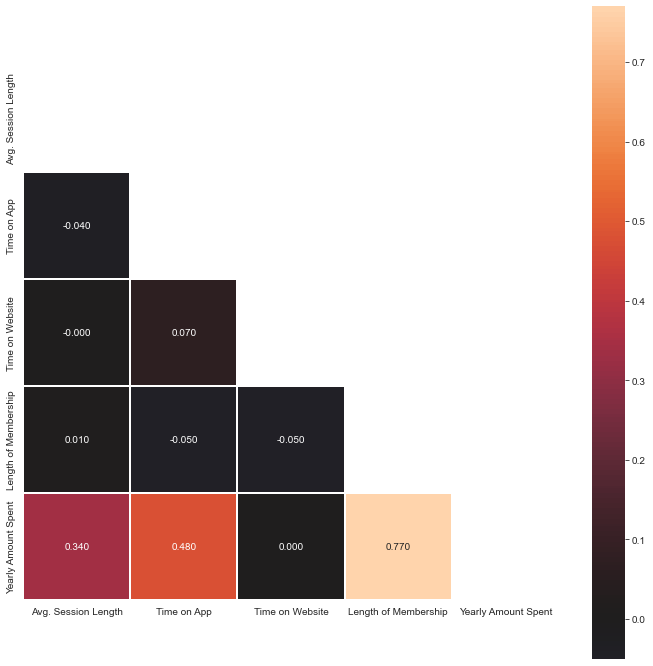

In [133]:
# correlation analysis
# length of membership has a strong relationship with target column (yearly amount spent)
# Time on app has a stronger relationship with target column than time on website
# no multi-collinear found among predictors/features

matrix = df.corr().round(2)

mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap (matrix, center=0, fmt=".3f", square=True, 
annot=True, linewidth=.3, mask=mask)

plt.savefig('.\\assets\\num_corr.png')
plt.show()

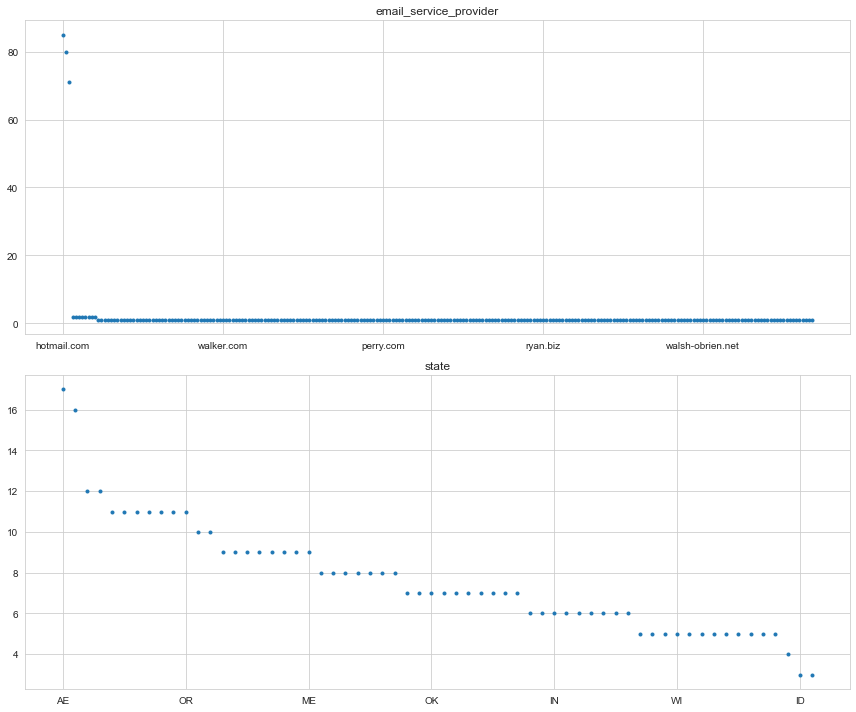

In [135]:
# nonnumeric column distribution


fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(12, 10))

# Identify non-numerical features
df_non_numerical = df.select_dtypes(exclude="number")

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=False, title=col, lw=0, marker=".", ax=ax)

plt.savefig('.\\assets\\nonnum_dist.png')
plt.tight_layout();

In [94]:
# geographical distribution - so diverse

state = df['state'].value_counts(normalize=True).reset_index()
state.columns = ['state', 'percent']
state['percent'] = state['percent']*100

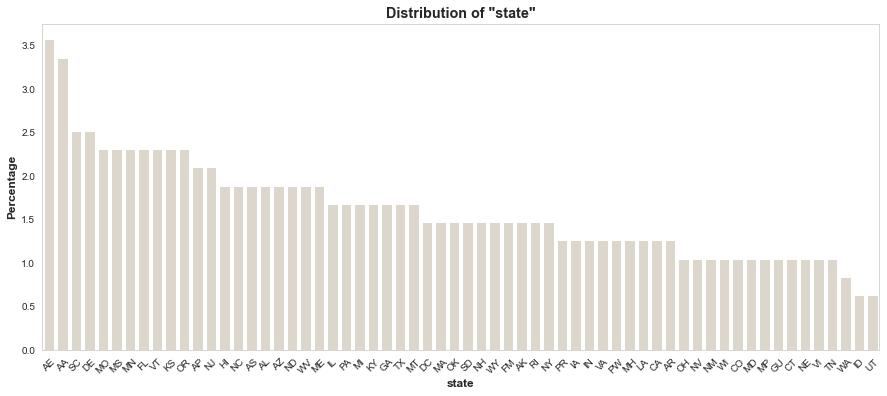

In [136]:
# distribution of state

plt.figure(figsize=(15,6))
splot = sns.barplot(x =state['state'], 
                    y =state['percent'],
                   color=colors_nude[-1])

plt.xlabel('state', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "state"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\state_dist.png')
plt.show()

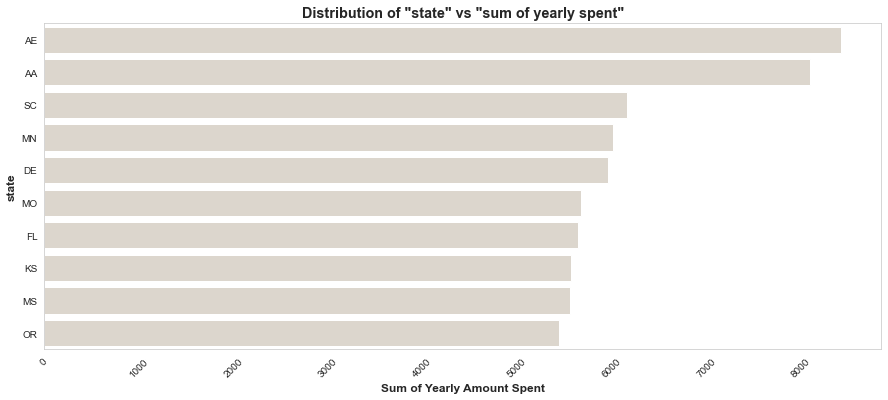

In [138]:
state_spent_sum = df.groupby(by='state').sum()['Yearly Amount Spent'].reset_index().sort_values(by='Yearly Amount Spent', ascending=False)


# distribution of top 10 states with the biggest sum of yearly spent

plt.figure(figsize=(15,6))
splot = sns.barplot(data = state_spent_sum.head(10),
                    y ='state', 
                    x ='Yearly Amount Spent',
                   color=colors_nude[-1])

plt.xlabel('Sum of Yearly Amount Spent', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('state', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "state" vs "sum of yearly spent"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\num_state_vs_sumyearspent.png')
plt.show()

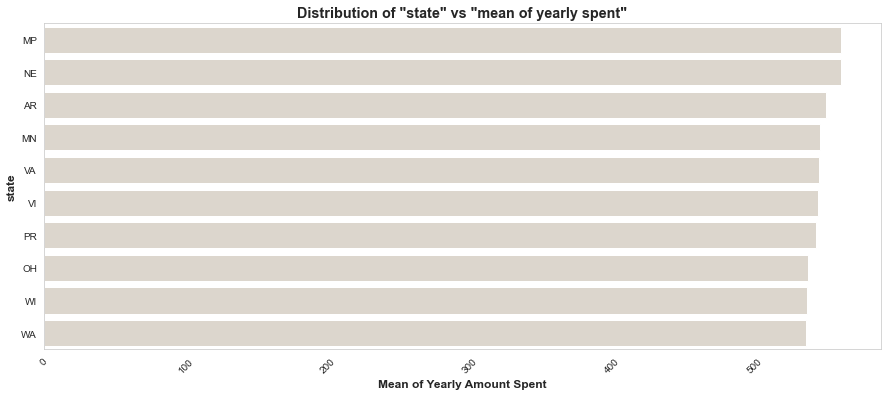

In [139]:
# distribution of top 5 states with the biggest mean of yearly spent
# no big difference

state_spent_mean = df.groupby(by='state').mean()['Yearly Amount Spent'].reset_index().sort_values(by='Yearly Amount Spent', ascending=False)


plt.figure(figsize=(15,6))
splot = sns.barplot(data = state_spent_mean.head(10),
                    y ='state', 
                    x ='Yearly Amount Spent',
                   color=colors_nude[-1])

plt.xlabel('Mean of Yearly Amount Spent', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('state', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "state" vs "mean of yearly spent"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\num_state_vs_meanyearspent.png')
plt.show()

In [117]:
state_spent_mean[state_spent_mean['state']=='AE']

,state,Yearly Amount Spent
1,AE,495.891746


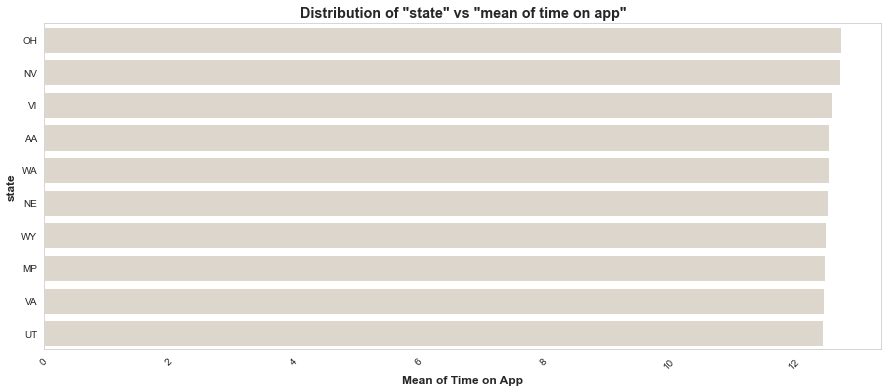

In [140]:
# distribution of top 10 states with the biggest time on app
# no big difference

state_app = df.groupby(by='state').mean()['Time on App'].reset_index().sort_values(by='Time on App', ascending=False)


plt.figure(figsize=(15,6))
splot = sns.barplot(data = state_app.head(10),
                    y ='state', 
                    x ='Time on App',
                   color=colors_nude[-1])

plt.xlabel('Mean of Time on App', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('state', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "state" vs "mean of time on app"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\num_state_vs_meantimeapp.png')
plt.show()

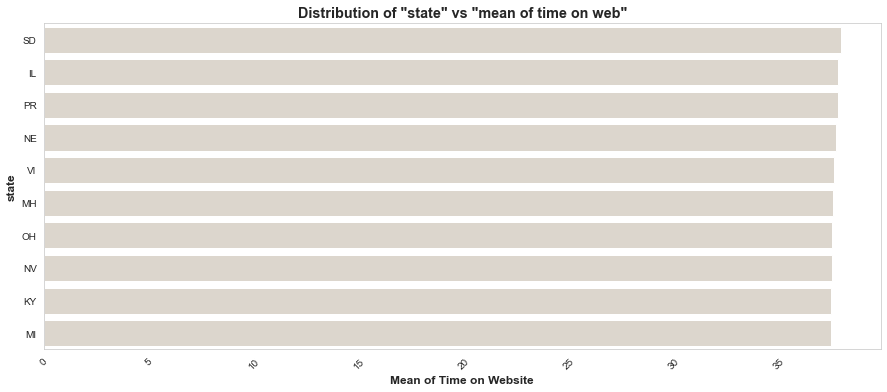

In [141]:
# distribution of top 10 states with the biggest time on web
# no big difference

state_web = df.groupby(by='state').mean()['Time on Website'].reset_index().sort_values(by='Time on Website', ascending=False)


plt.figure(figsize=(15,6))
splot = sns.barplot(data = state_web.head(10),
                    y ='state', 
                    x ='Time on Website',
                   color=colors_nude[-1])

plt.xlabel('Mean of Time on Website', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('state', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "state" vs "mean of time on web"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\num_state_vs_meantimeweb.png')
plt.show()

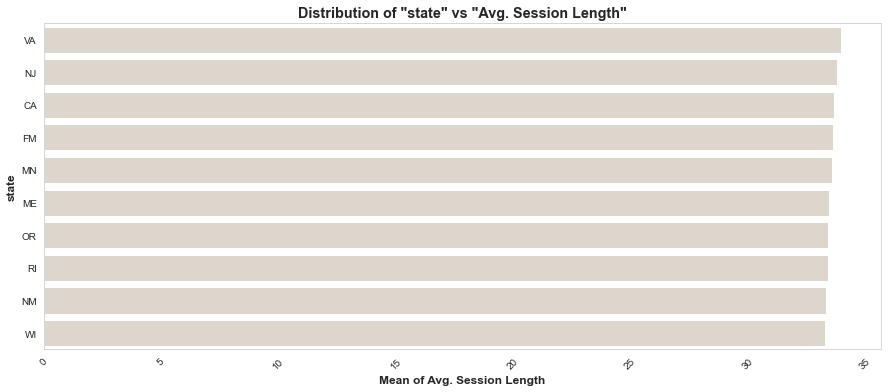

In [142]:
# distribution of top 10 states with the biggest session time
# no big difference

state_session = df.groupby(by='state').mean()['Avg. Session Length'].reset_index().sort_values(by='Avg. Session Length', ascending=False)


plt.figure(figsize=(15,6))
splot = sns.barplot(data = state_session.head(10),
                    y ='state', 
                    x ='Avg. Session Length',
                   color=colors_nude[-1])

plt.xlabel('Mean of Avg. Session Length', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('state', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "state" vs "Avg. Session Length"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\num_state_vs_meansession.png')
plt.show()

In [20]:
# email distribution - so diverse, 235 email_service_provider found

mail = df['email_service_provider'].value_counts(normalize=True).reset_index()
mail.columns = ['mail', 'percent']
mail['percent'] = mail['percent']*100
mail.shape

(235, 2)

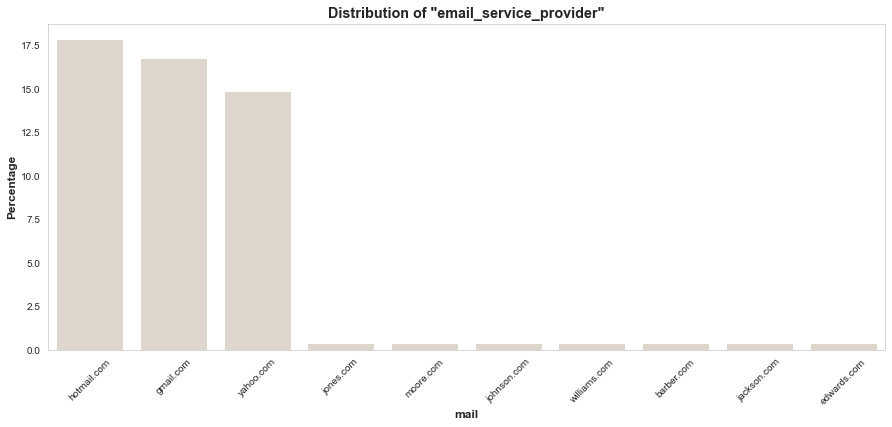

In [21]:
# distribution of email_service_provider - top 10
# majority coming from: hotmail, gmail, yahoo

plt.figure(figsize=(15,6))
splot = sns.barplot(data=mail.head(10),
                    x ='mail', 
                    y ='percent',
                   color=colors_nude[-1])

plt.xlabel('mail', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "email_service_provider"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\mail_dist.png')
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:red;font-size:150%;
            font-family:Calibri;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>| checkpoint_1</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [6]:
df.to_csv('.\\datasets\\checkpoint_1.csv', index=False)

In [5]:
df = pd.read_csv('.\\datasets\\checkpoint_1.csv')
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,email_service_provider,state
0,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI
1,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA
2,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC
3,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH
4,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR


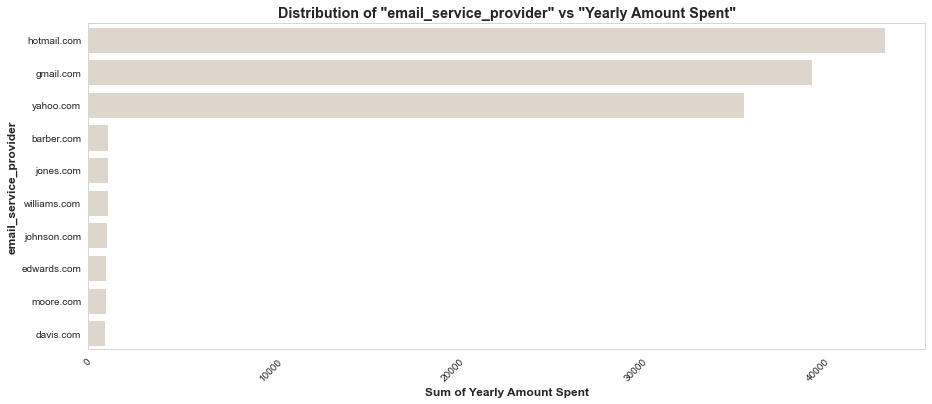

In [17]:
mail_spent_sum = df.groupby(by='email_service_provider').sum()['Yearly Amount Spent'].reset_index().sort_values(by='Yearly Amount Spent', ascending=False)



plt.figure(figsize=(15,6))
splot = sns.barplot(data = mail_spent_sum.head(10),
                    y ='email_service_provider', 
                    x ='Yearly Amount Spent',
                   color=colors_nude[-1])

plt.xlabel('Sum of Yearly Amount Spent', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('email_service_provider', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "email_service_provider" vs "Yearly Amount Spent"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\num_emailvs_Yearly Amount Spent.png')
plt.show()

In [6]:
df['domain'] = df['email_service_provider'].apply(lambda x: x.split('.')[-1])

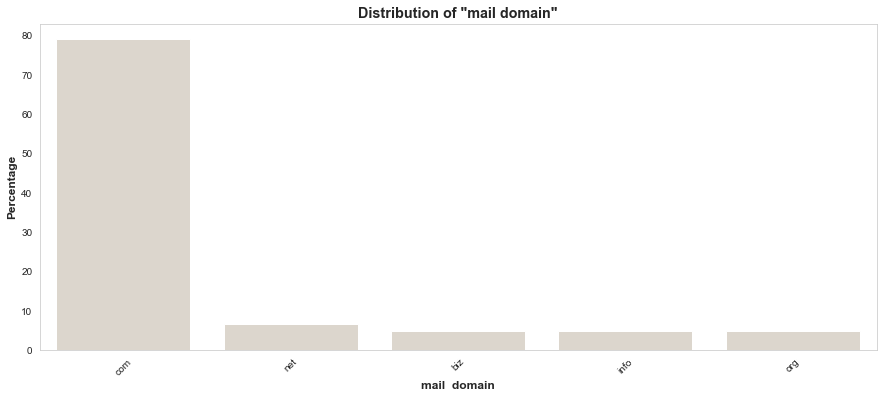

In [22]:
plt.figure(figsize=(15,6))
splot = sns.barplot(x =df['domain'].value_counts(normalize=True).index, 
                    y =df['domain'].value_counts(normalize=True).values*100,
                   color=colors_nude[-1])

plt.xlabel('mail  domain', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Percentage', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "mail domain"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\domain_dist.png')
plt.show()

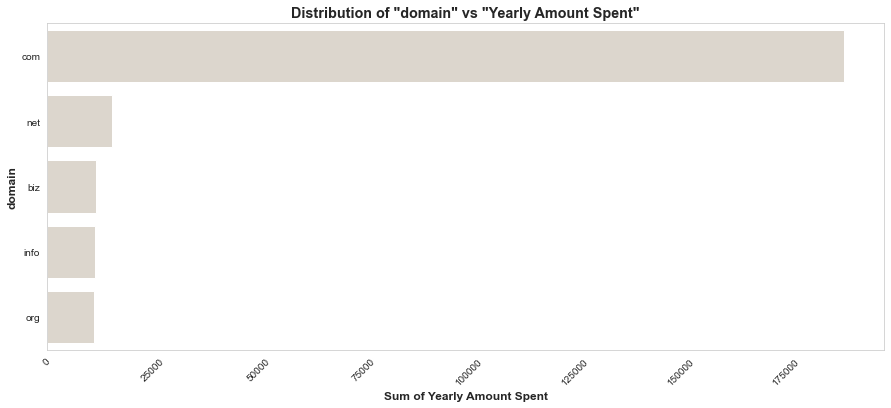

In [23]:
domain_spent_sum = df.groupby(by='domain').sum()['Yearly Amount Spent'].reset_index().sort_values(by='Yearly Amount Spent', ascending=False)



plt.figure(figsize=(15,6))
splot = sns.barplot(data = domain_spent_sum,
                    y ='domain', 
                    x ='Yearly Amount Spent',
                   color=colors_nude[-1])

plt.xlabel('Sum of Yearly Amount Spent', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('domain', 
           fontsize='large',
           fontweight='bold')
plt.title('Distribution of "domain" vs "Yearly Amount Spent"', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\num_domainvs_Yearly Amount Spent.png')
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:gray;font-size:150%;
            font-family:Calibri;letter-spacing:0.5px" id='assumption'>
    <p style="padding: 8px;color:white;"><b>| Regression Assumptions Check</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

### The assumptions to be checked
- **Multi-collinearity** = we have done it above and just little collinearity found
- **Linearity** = in the dataset, target column seems to follow this assumption
- **Hom Sket** = target column seems to have equal variance, as the residuals are randomly scattered around the centerline of zero with no apparent pattern
- **Normality** = Yes the target column follow the normal distribution assumption

### Linearity Check

In [7]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent', 'email_service_provider',
       'state', 'domain'],
      dtype='object')

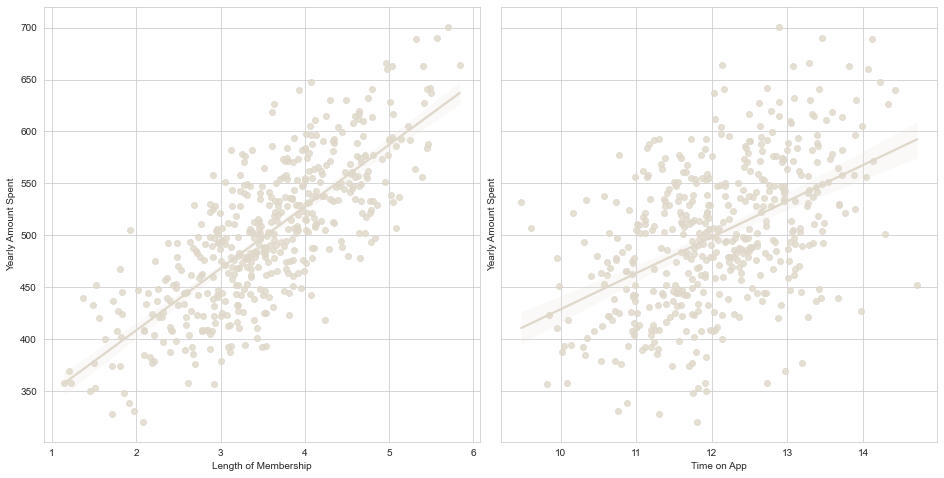

In [30]:
fig, ax = plt.subplots(1,2,figsize = (16,8),sharey=True )
fig.subplots_adjust(hspace=0.01, wspace=0.05)
sns.regplot(x=df['Length of Membership'], y=df['Yearly Amount Spent'], ax=ax[0] ,color=colors_nude[-1])
sns.regplot(x=df['Time on App'], y=df['Yearly Amount Spent'], ax=ax[1],color=colors_nude[-1]);
plt.savefig('.\\assets\\assumption_linear.png')
plt.show()

### Homoscedasticity Check

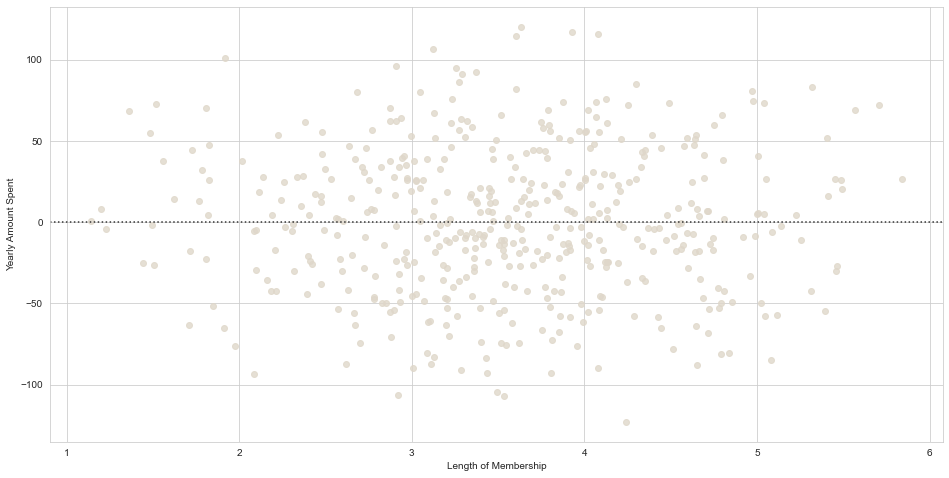

In [32]:
plt.subplots(figsize = (16,8))
sns.residplot(df['Length of Membership'], 
              df['Yearly Amount Spent'],
              color=colors_nude[-1]);
plt.savefig('.\\assets\\assumption_homsket.png')
plt.show()

### Normality Check


 mu = 500.53 and sigma = 69.70



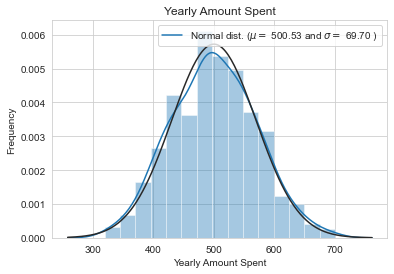

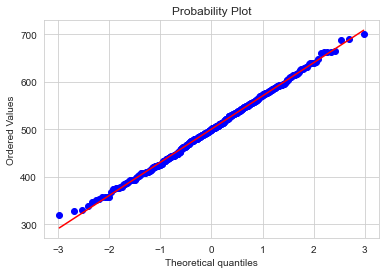

In [33]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(df['Yearly Amount Spent'] , fit=norm);

(mu, sigma) = norm.fit(df['Yearly Amount Spent'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Yearly Amount Spent')

fig = plt.figure()
res = stats.probplot(df['Yearly Amount Spent'], plot=plt)
plt.savefig('.\\assets\\assumption_normal.png')
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:gray;font-size:150%;
            font-family:Calibri;letter-spacing:0.5px" id='feateng'>
    <p style="padding: 8px;color:white;"><b>| Feature Engineering</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [8]:
# from now on, I dropped state & email_service_provider column because of high cardinality

df.drop(labels=['email_service_provider', 'state'], axis=1, inplace=True)

In [9]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,domain
0,34.497268,12.655651,39.577668,4.082621,587.951054,com
1,31.926272,11.109461,37.268959,2.664034,392.204933,com
2,33.000915,11.330278,37.110597,4.104543,487.547505,com
3,34.305557,13.717514,36.721283,3.120179,581.852344,com
4,33.330673,12.795189,37.536653,4.446308,599.406092,com


In [10]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

df_cat.columns

Index(['domain'], dtype='object')

In [11]:
df_cat_dummy = pd.get_dummies(df_cat, drop_first=True)

df_encode = pd.concat([df_num, df_cat_dummy], axis=1)
# df_encode.head()

In [12]:
X = df_encode.drop(labels='Yearly Amount Spent', axis=1)
y = df_encode['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [13]:
# scale numerical column

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

<div style="color:white;display:fill;border-radius:8px;
            background-color:gray;font-size:150%;
            font-family:Calibri;letter-spacing:0.5px" id='featsel'>
    <p style="padding: 8px;color:white;"><b>| Feature Selection</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

Between L1 Regularization & Feature Importance of Random Forest give the similar result. From now on for simplicity of model, the predictors for **Yearly Amount Spent** are only:
- **length of membership**
- **time on app**
- **session length**

In [15]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(alphas=[0.1, 1, 5, 10], 
                fit_intercept=False, 
                cv=10, 
                max_iter=5000, 
                n_jobs=-1)

lasso.fit(scaled_X_train, y_train)

LassoCV(alphas=[0.1, 1, 5, 10], cv=10, fit_intercept=False, max_iter=5000,
        n_jobs=-1)

In [20]:
# let's once again use features importance of random forest

forest = RandomForestRegressor()
forest.fit(scaled_X_train, y_train)

RandomForestRegressor()

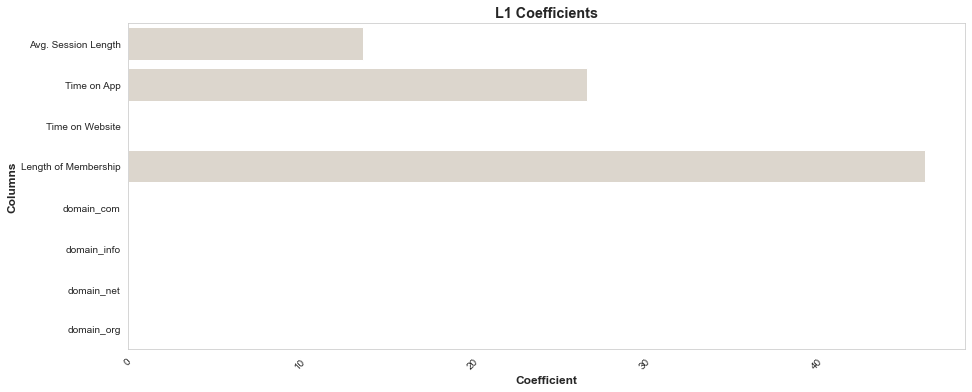

In [22]:
# the length of membership, time on app, and avg. session length are the most useful predictors

plt.figure(figsize=(15,6))
splot = sns.barplot(y =X_train.columns, 
                    x =lasso.coef_,
                   color=colors_nude[-1])

plt.xlabel('Coefficient', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Columns', 
           fontsize='large',
           fontweight='bold')
plt.title('L1 Coefficients', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\featsel_l1.png')
plt.show()

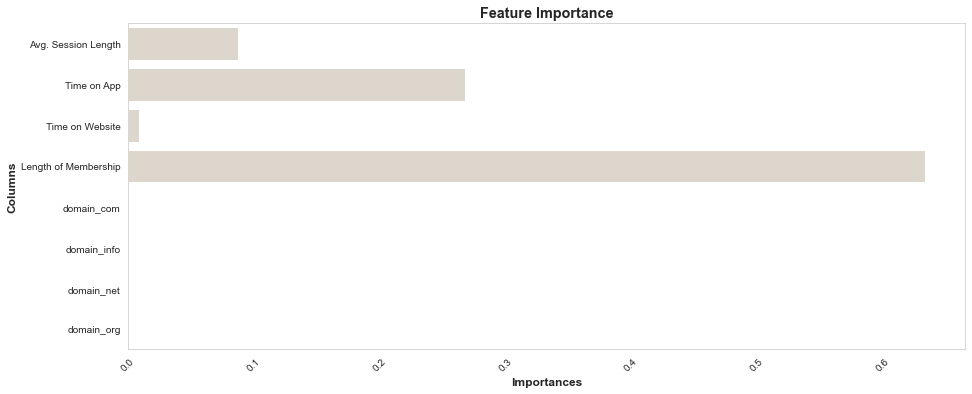

In [23]:
plt.figure(figsize=(15,6))
splot = sns.barplot(y =X_train.columns, 
                    x =forest.feature_importances_,
                   color=colors_nude[-1])

plt.xlabel('Importances', 
           fontsize='large',
           fontweight='bold')
plt.ylabel('Columns', 
           fontsize='large',
           fontweight='bold')
plt.title('Feature Importance', 
           fontsize='x-large',
           fontweight='bold')
plt.xticks(rotation = 45)
plt.grid(False)
plt.savefig('.\\assets\\featsel_featimportance.png')
plt.show()

In [13]:
# X = df_encode[['Length of Membership', 'Time on App', 'Avg. Session Length']]
# y = df_encode['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [14]:
# scale numerical column

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

<div style="color:white;display:fill;border-radius:8px;
            background-color:gray;font-size:150%;
            font-family:Calibri;letter-spacing:0.5px" id='modeling'>
    <p style="padding: 8px;color:white;"><b>| Modeling</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [16]:
from sklearn.linear_model import ElasticNetCV

ElN =ElasticNet()
ElN_param_grid = {'alpha' : [0.1, 0.5, 1, 10, 30],
                  'l1_ratio' :[ 0.01, 0.1, 0.5, 0.9]}

                  
gsElN = GridSearchCV(ElN, 
                     param_grid = ElN_param_grid, 
                     cv=5,
                     scoring="neg_mean_squared_error", 
                     n_jobs= -1)

gsElN.fit(scaled_X_train, y_train)
gsElN.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=0.9)

In [35]:
from sklearn.svm import SVR

svr = SVR()
svr_param_grid = {'kernel': ['rbf', 'poly'],
                 'degree': [1,2,3],
                 'C': [0.01, 0.1, 1]}

gssvr = GridSearchCV(svr, 
                     param_grid = svr_param_grid, 
                     cv=5,
                     scoring="neg_mean_squared_error", 
                     n_jobs= -1)

gssvr.fit(scaled_X_train, y_train)
gssvr.best_estimator_

SVR(C=1, degree=1, kernel='poly')

In [37]:
RFR =RandomForestRegressor()
RFR_param_grid = {"max_features": [1, 3, 10],
                    "min_samples_split": [2, 3, 10],
                    "n_estimators" :[100,300],}

gsRFR = GridSearchCV(RFR,
                     param_grid = RFR_param_grid, 
                     cv=5,
                     scoring="neg_mean_squared_error", 
                     n_jobs= -1, 
                     verbose = 1)

gsRFR.fit(scaled_X_train, y_train)
gsRFR.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


RandomForestRegressor(max_features=3, n_estimators=300)

In [38]:
GBR = GradientBoostingRegressor()
GBR_param_grid = {'n_estimators' : [100,300],
                'learning_rate': [0.1, 0.05, 0.01],
                'max_depth': [3, 6],
                'min_samples_leaf': [100,150]}


gsGBR = GridSearchCV(GBR,param_grid = 
                     GBR_param_grid, 
                     cv=5,
                     scoring="neg_mean_squared_error", 
                     n_jobs= -1, 
                     verbose = 1)

gsGBR.fit(scaled_X_train, y_train)
gsGBR.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GradientBoostingRegressor(learning_rate=0.05, max_depth=6, min_samples_leaf=100,
                          n_estimators=300)

### Learning Curve

From the learning curves below, I think the elasticnet model has the best performance.

In [44]:
def learning_curves(models, X_train, y_train):
    for model in models:
        plt.figure(figsize=(8,6))
        train_sizes, train_scores, validation_scores = learning_curve(model, 
                                                                      X_train, 
                                                                      y_train,
                                                                      cv = 5, 
                                                                      scoring = 'neg_mean_squared_error')
        
        train_scores_mean = -train_scores.mean(axis = 1)
        validation_scores_mean = -validation_scores.mean(axis = 1)

        plt.plot(train_sizes, train_scores_mean, label = 'Training error')
        plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

        plt.ylabel('MSE', fontsize = 14)
        plt.xlabel('Training set size', fontsize = 14)
        title = 'Learning curves for a ' + str(model).split('(')[0] + ' model'
        plt.title(title, fontsize = 18, y = 1.03)
        plt.legend()
        name = str(model).split('(')[0]
        plt.savefig(f'.\\assets\\learningcurve_{name}.png')
        plt.show()

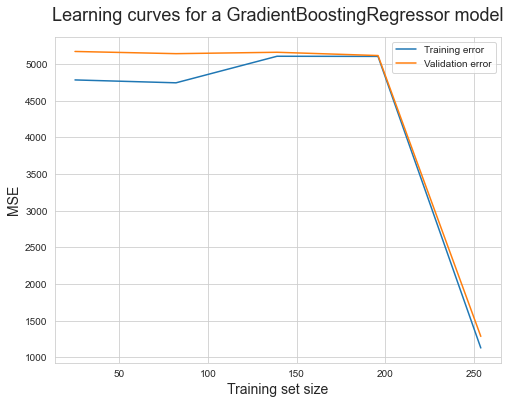

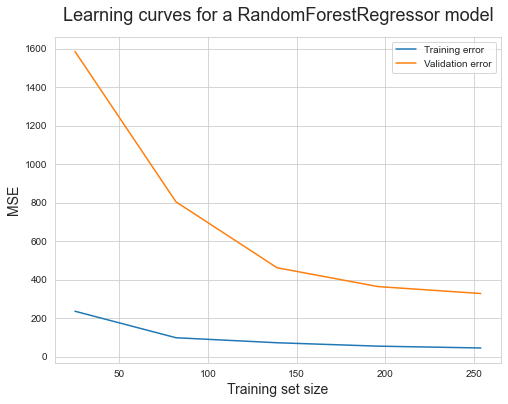

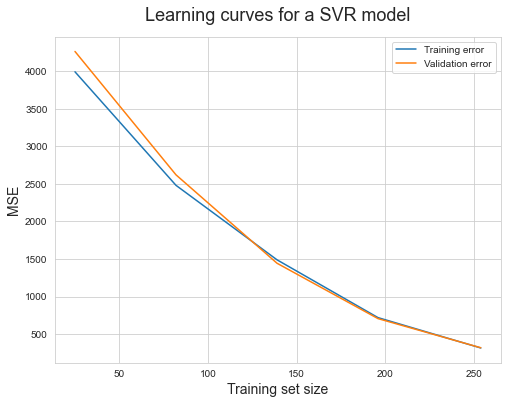

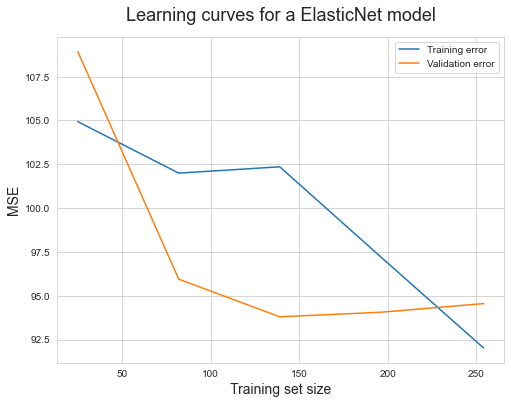

In [45]:
regressors = [gsGBR.best_estimator_, 
              gsRFR.best_estimator_, 
              gssvr.best_estimator_, 
              gsElN.best_estimator_]

learning_curves(regressors, scaled_X_train, y_train)

**The model is quite good at predicting the target column**

In [17]:
gsElN.fit(scaled_X_train, y_train)

y_pred = gsElN.predict(scaled_X_test)

print('Result:')
print("\tExplained variance:", explained_variance_score(y_test, y_pred))
print("\tMean absolute error:", mean_squared_error(y_test, y_pred))
print("\tR2 score:", r2_score(y_test, y_pred))
print()

Result:
	Explained variance: 0.9737070266098946
	Mean absolute error: 119.9474035725415
	R2 score: 0.9723731091958786



In [18]:
gsElN.best_params_

{'alpha': 0.1, 'l1_ratio': 0.9}

<div style="color:white;display:fill;border-radius:8px;
            background-color:gray;font-size:150%;
            font-family:Calibri;letter-spacing:0.5px" id='final'>
    <p style="padding: 8px;color:white;"><b>| Final Model</b></p>
</div>
<div style="color:white;display:fill;border-radius:8px

In [19]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), 
                     ElasticNet(alpha=0.1, 
                                l1_ratio=0.9,
                                random_state=0))

pipe.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=0))])

In [20]:
y_pred = pipe.predict(X)
mean_squared_error(y, y_pred)

100.7524657056883

In [1]:
from joblib import dump, load

dump(pipe, 'model.joblib')

In [2]:
model = load('model.joblib')

In [6]:
model.predict([[31, 11, 2.66]])

array([353.86643357])

In [7]:
model.predict([[33, 11.33, 4.1]])

array([504.758969])

# <b>3 <span style='color:#0386f7de' id='wrap'>|</span> Wrap Up</b>

### Key Insight
**1. Answering Stakeholders Questions**  
- *Which one should we focus on between market based on app or website?*  
Clearly market based on app which shown by the time on app column has a stronger correlation with target column, Yearly Amount Spent. However, further analysis should be done to analyze why the customer on average put higher time in the website instead. The follow-up questions are:
    - are the UI & UX or features of the mobile app better than the website, so the level of time spend in the mobile app is lower?
    - what are the reasons the users use the website higher than the mobile app?  
    
> To be clear, if the purpose is to increase the amount of yearly spent by users, the length of membership has the highest correlation with the target column. Therefore, measures taken to lengthen the membership time will be the main focus. Users analysis should be taken to analyze the behaviour of user purchase.  

**2. Modeling**  
The final model built is based on linear regression model (elasticnet) with:
- explained variance: **0.973**
- mean absolute error: **119.947**
- root mean squared error: **10.952** (mean of target column= 499.314)
- r2: **0.972**


**3. Univariate & Multivariate (EDA)**  
- Yearly amount of spent = 499.31 ± 79.314
- Length of memberhsip = 3.533 ± 0.999
- Time on App = 12.052 ± 0.994
- Time on Website = 37.060 ± 1.01
- Avg. Session Length = 33.053 ± 0.992  

- The columns which has most correlation with the target column (Yearly Amount Spent) is the Membership Length column, followup by Time on app and Avg. Session Length.  

- Relationship among variables:  
    - The "Membership Length" & "Yearly Amount Spent" have a strong linear relation
    - The "Time on App" & "Yearly Amount Spent" have a weaker linear relation
    - State AE & AA have the highest values of yearly spent
    - hotmail, gmail, and yahoo are the most frequently used mail by user (a login or a sign-up process to ease these mail user should be provided in the app or the website). The users from the mail services above are also most contributed to the yearly spent.  


**4. Follow-up Actions**  
- User analysis should be follow-up to learn the user purchasing behaviour & the keys driver to lengthen membership time.
- Further analysis to analyze why the user spend longer time in the website than in the app should be done.
- A model to predict yearly spent will be developed with REST API.
- A dashboard to visually describe operational will be developed.